<h1 style="background-color: #1F497D; color: white; padding: 10px; border-radius: 8px; text-align: center;">
Loan Approval Prediction
</h1>

###  Project Objective

***

The primary objective of this project is to develop an automated, reliable, and scalable machine learning model capable of accurately predicting the **approval or rejection** of a loan application.

This system aims to address the inefficiencies, inconsistencies, and potential biases of manual assessment by:

1.  **Increasing Efficiency:** Significantly reducing the time required to process and evaluate loan applications.
2.  **Improving Accuracy:** Leveraging data-driven insights to make more accurate and objective lending decisions.
3.  **Enhancing Fairness:** Ensuring all applicants are evaluated based on a consistent, objective set of criteria derived from features (demographic, financial, and credit-related).

By successfully implementing this predictive model, the goal is to **streamline operations**, **reduce risk** for the institution, and provide quicker, fairer responses to all applicants.

###  Essential Libraries

***

We import **Pandas** for data handling, **`sklearn.model_selection`** for train/test split, **`LogisticRegression`** for the model, and **`sklearn.metrics`** for evaluating performance (confusion matrix/classification report).

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


###  Dataset

***
* **Source (notebook cell):** `D:\WsCube_Tech_Milestone_Projects\loan_approval_dataset.csv`
* **Rows:** 4,269
* **Columns:** 13
* **Example columns:** `loan_id`, `no_of_dependents`, `education`, `self_employed`, `income_annum`, `loan_amount`, `loan_term`, `cibil_score`, `residential_assets_value`, `commercial_assets_value`, `luxury_assets_value`, `bank_asset_value`, `loan_status`

In [2]:
df=pd.read_csv(r"D:\WsCube_Tech_Milestone_Projects\loan_approval_dataset.csv")
print(f"{df.shape}")
df.head()

(4269, 13)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


###  Data Inspection: Info, Nulls, Duplicates, and Description

***

Before cleaning or modeling, we perform an initial inspection of the dataset. This step uses key methods: **`.info()`** to check data types and non-null counts, **`.isnull().sum()`** to identify the total number of missing values per column, **`.duplicated().sum()`** to count any duplicate rows, and **`.describe()`** to view the statistical summary of numerical features. This ensures data quality and readiness for preprocessing.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


###  Preprocessing and Target Check

***

This section outlines the data preparation steps, including cleaning and encoding, followed by an inspection of the target variable's distribution before the final feature and target split.

* Removed spaces from column names.
* **Encoded categorical columns:**
    * `education`: **Graduate** $\rightarrow$ 1, **Not Graduate** $\rightarrow$ 0
    * `self_employed`: **Yes** $\rightarrow$ 1, **No** $\rightarrow$ 0
    * `loan_status` (target): **Approved** $\rightarrow$ 1, **Rejected** $\rightarrow$ 0

### Target Variable Distribution

After encoding, we check the class balance of the `loan_status` variable.

* **Interpretation and Feature/Target Split:** The dataset is moderately imbalanced, with **Approved loans (1) making up approximately 62.2%** of the data, and **Rejected loans (0) making up 37.8%**. This imbalance will be addressed during model training (e.g., using `class_weight='balanced'`). Finally, the preprocessed data is split:
    * **Feature matrix $X$:** all columns except `loan_status` (12 features).
    * **Target $y$:** `loan_status` (binary).

In [7]:
df.columns=df.columns.str.replace(" ","")

print(f"{df["education"].unique()}")
print(f"{df["self_employed"].unique()}")
print(f"{df["loan_status"].unique()}")

[' Graduate' ' Not Graduate']
[' No' ' Yes']
[' Approved' ' Rejected']


In [8]:
df["education"]=df["education"].str.strip().map({"Graduate":1,"Not Graduate":0})
df["self_employed"]=df["self_employed"].str.strip().map({"Yes":1,"No":0})
df["loan_status"]=df["loan_status"].str.strip().map({"Approved":1,"Rejected":0})

In [9]:
print(f"{df["loan_status"].value_counts()}")
print("-"*40)
print(f"{df["loan_status"].value_counts(normalize=True)}")

loan_status
1    2656
0    1613
Name: count, dtype: int64
----------------------------------------
loan_status
1    0.62216
0    0.37784
Name: proportion, dtype: float64


In [10]:
x=df.drop(columns="loan_status")
y=df["loan_status"]

###  Train-Test Split

***
* **Method:** `train_test_split` with `stratify=y`
* **Test size:** 20%
* **Random state:** 42
* **Resulting sizes:**
    * Training set: 3,415 rows
    * Test set: 854 rows

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3415, 12), (854, 12), (3415,), (854,))

###  Model

***
* **Algorithm:** **LogisticRegression**
* **Parameters used:** `max_iter=500`, `class_weight="balanced"`
* **Training:** `model.fit(x_train, y_train)`
* **Prediction:** `y_pred = model.predict(x_test)`

In [13]:
model=LogisticRegression(max_iter=500, class_weight="balanced")

In [14]:
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [15]:
y_pred=model.predict(x_test)

###  Confusion Matrix (test set)

***
<h3 style="background-color: black; color: white; padding: 2px 6px; border-radius: 4px; width: fit-content; font-size: 18px;">
Matrix ( [[TN, FP], [FN, TP]] )
</h3>

$$
\begin{bmatrix}
242 & 81 \\
77 & 454
\end{bmatrix}
$$
<br>

| Metric | Count | Interpretation on Test Set |
| :--- | :--- | :--- |
| **True Negatives (TN)** | 242 | Rejected predicted as Rejected |
| **False Positives (FP)** | 81 | Rejected predicted as Approved |
| **False Negatives (FN)** | 77 | Approved predicted as Rejected |
| **True Positives (TP)** | 454 | Approved predicted as Approved |
| **Total Test Samples** | 854 | |

In [16]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[242  81]
 [ 77 454]]


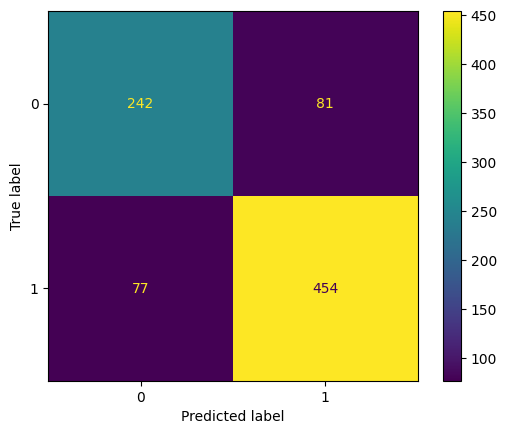

In [17]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [18]:
model.score(x_test,y_test)

0.8149882903981265

In [19]:
print(f'classification_report:\n\n{classification_report(y_test,y_pred)}')

classification_report:

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       323
           1       0.85      0.85      0.85       531

    accuracy                           0.81       854
   macro avg       0.80      0.80      0.80       854
weighted avg       0.81      0.81      0.81       854



<h2 style="text-align: center;">
  <span style="background-color:#1F497D; color: white; padding: 5px; border-radius: 5px;">
    Overall Summary: Loan Approval Model Performance
  </span>
</h2>

This notebook successfully built a **Logistic Regression** model for loan approval prediction, using **balanced class weighting** to handle the data's imbalance.

### Key Results

| Metric | Approved (Positive) | Rejected (Negative) | Overall |
| :--- | :--- | :--- | :--- |
| **F1-Score** | **0.852** | 0.754 | **Accuracy:** 81.5% |
| **Recall** | 0.855 | 0.749 | |
| **Precision** | 0.849 | 0.759 | |

### Interpretation

The model performs strongly, particularly for the critical **Approved (Positive)** class:

* **Reliable Approvals:** The high **Precision (0.849)** means the model is reliable when it approves a loan, keeping the risk of **False Positives** low.
* **Effective Detection:** The excellent **Recall (0.855)** ensures the model successfully catches most of the truly approved loans, maximizing potential business gain.
* **Conclusion:** The **F1-score of 0.852** shows a great balance. The model is highly effective at predicting loan approval outcomes in a robust and fair manner.

<h2 style="text-align: center;">
  <span style="background-color:#1F497D; color: white; padding: 5px; border-radius: 5px;">
    Project Success Summary: Meeting Objectives
  </span>
</h2>

The **Logistic Regression** model successfully achieved the project's goal of creating a **reliable, automated loan approval system**. Its strong performance directly supports all three objectives:

1.  **Efficiency:** The system allows for **instant, automated classification**, significantly reducing manual processing time.
2.  **Accuracy & Risk Control:** Overall **Accuracy is 81.5%**. The high **Precision for Approved Loans (0.849)** confirms that the model minimizes **False Approvals**, effectively **reducing lending risk**.
3.  **Fairness:** The algorithm ensures **consistent, objective evaluation** based on data (income, CIBIL, etc.), eliminating human inconsistencies and potential bias.

The robust **F1-Score of 0.852** for the Approved class confirms the model is highly effective and fit for purpose.